In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",200)

Looking and understanding data.

In [ ]:
leads_df=pd.read_csv("Leads.csv")

In [ ]:
print("Data Shape is : ",leads_df.shape[1],"Columns And",leads_df.shape[0],"Rows")

Data Shape is :  37 Columns And 9240 Rows


In [ ]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##Data Cleaning

In [ ]:
#As select refers to the values that are not selected hence replacing it with Null values.
#Replacing 'Select' values with Nan
leads_df=leads_df.replace("Select", np.nan)

Checking for null values and arranging them in decending order.

In [ ]:
null_prct=leads_df.isnull().sum()/leads_df.shape[0]*100
null_prct=null_prct.sort_values(ascending=False)
null_prct

,0
How did you hear about X Education,78.463203
Lead Profile,74.188312
Lead Quality,51.590909
Asymmetrique Profile Score,45.649351
Asymmetrique Activity Score,45.649351
Asymmetrique Activity Index,45.649351
Asymmetrique Profile Index,45.649351
City,39.707792
Specialization,36.580087
Tags,36.287879


Removing Null values above 40%

In [ ]:
null_40=(null_prct[null_prct>40]).index.to_list()
leads_df.drop(columns=null_40,inplace=True)
print("Application data new shape : ", leads_df.shape)

Application data new shape :  (9240, 30)


Printing null percent of each column after removing null data.

In [ ]:
Null_values=leads_df.isnull().sum()/leads_df.shape[0]*100
Null_values=Null_values.sort_values(ascending=False)
Null_values

,0
City,39.707792
Specialization,36.580087
Tags,36.287879
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
Country,26.634199
Page Views Per Visit,1.482684
TotalVisits,1.482684
Last Activity,1.114719
Lead Source,0.389610


Null columns

In [ ]:
null_col=Null_values[Null_values>0]
null_col=null_col.index.to_list()
null_col

['City',
 'Specialization',
 'Tags',
 'What matters most to you in choosing a course',
 'What is your current occupation',
 'Country',
 'Page Views Per Visit',
 'TotalVisits',
 'Last Activity',
 'Lead Source']

Replacing all null values in categorical variable with the mode and numerical variable with median

In [ ]:
for col in null_col:
    if leads_df[col].dtype=="object":
        leads_df[col]=leads_df[col].fillna(leads_df[col].mode()[0])
    else:
        leads_df[col]=leads_df[col].fillna(leads_df[col].median())

In [ ]:
#Checking for count of missing values in each column
leads_df.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0


there are no null values in the data.

Finding number of unique alues in each column.

In [ ]:
leads_df.nunique().sort_values(ascending=False)

,0
Prospect ID,9240
Lead Number,9240
Total Time Spent on Website,1731
Page Views Per Visit,114
TotalVisits,41
Country,38
Tags,26
Lead Source,21
Specialization,18
Last Activity,17


selecting the column who has single value in them

In [ ]:
unique_cnt = leads_df.nunique()
single_value = unique_cnt[unique_cnt == 1]
single_value = single_value.index.to_list()
single_value

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

Dropping the values having single values a they are of no use.

In [ ]:
leads_df.drop(columns=single_value,inplace=True)
leads_df.shape

(9240, 25)

Removing the column with having all uniques values like ID as they are of no use in prediction.

In [ ]:
leads_df.drop(columns=["Prospect ID","Lead Number"],inplace=True)

In [ ]:
leads_df.nunique().sort_values(ascending=False)

,0
Total Time Spent on Website,1731
Page Views Per Visit,114
TotalVisits,41
Country,38
Tags,26
Lead Source,21
Specialization,18
Last Activity,17
Last Notable Activity,16
City,6


Looking into the count of unique values in each column to analyse data.

In [ ]:
for col in leads_df:
    print(leads_df[col].value_counts())
    print("*****************************************************")

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
*****************************************************
Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
*****************************************************
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
***********************************************

In [ ]:
#converting google with Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')

In [ ]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [ ]:
cat_col =leads_df.select_dtypes(include="object").columns.to_list()
num_col=leads_df.select_dtypes(include=["float64","int64"]).columns.to_list()
num_col.remove("Converted")

visualising categorical variable grouping with with Converted or not.

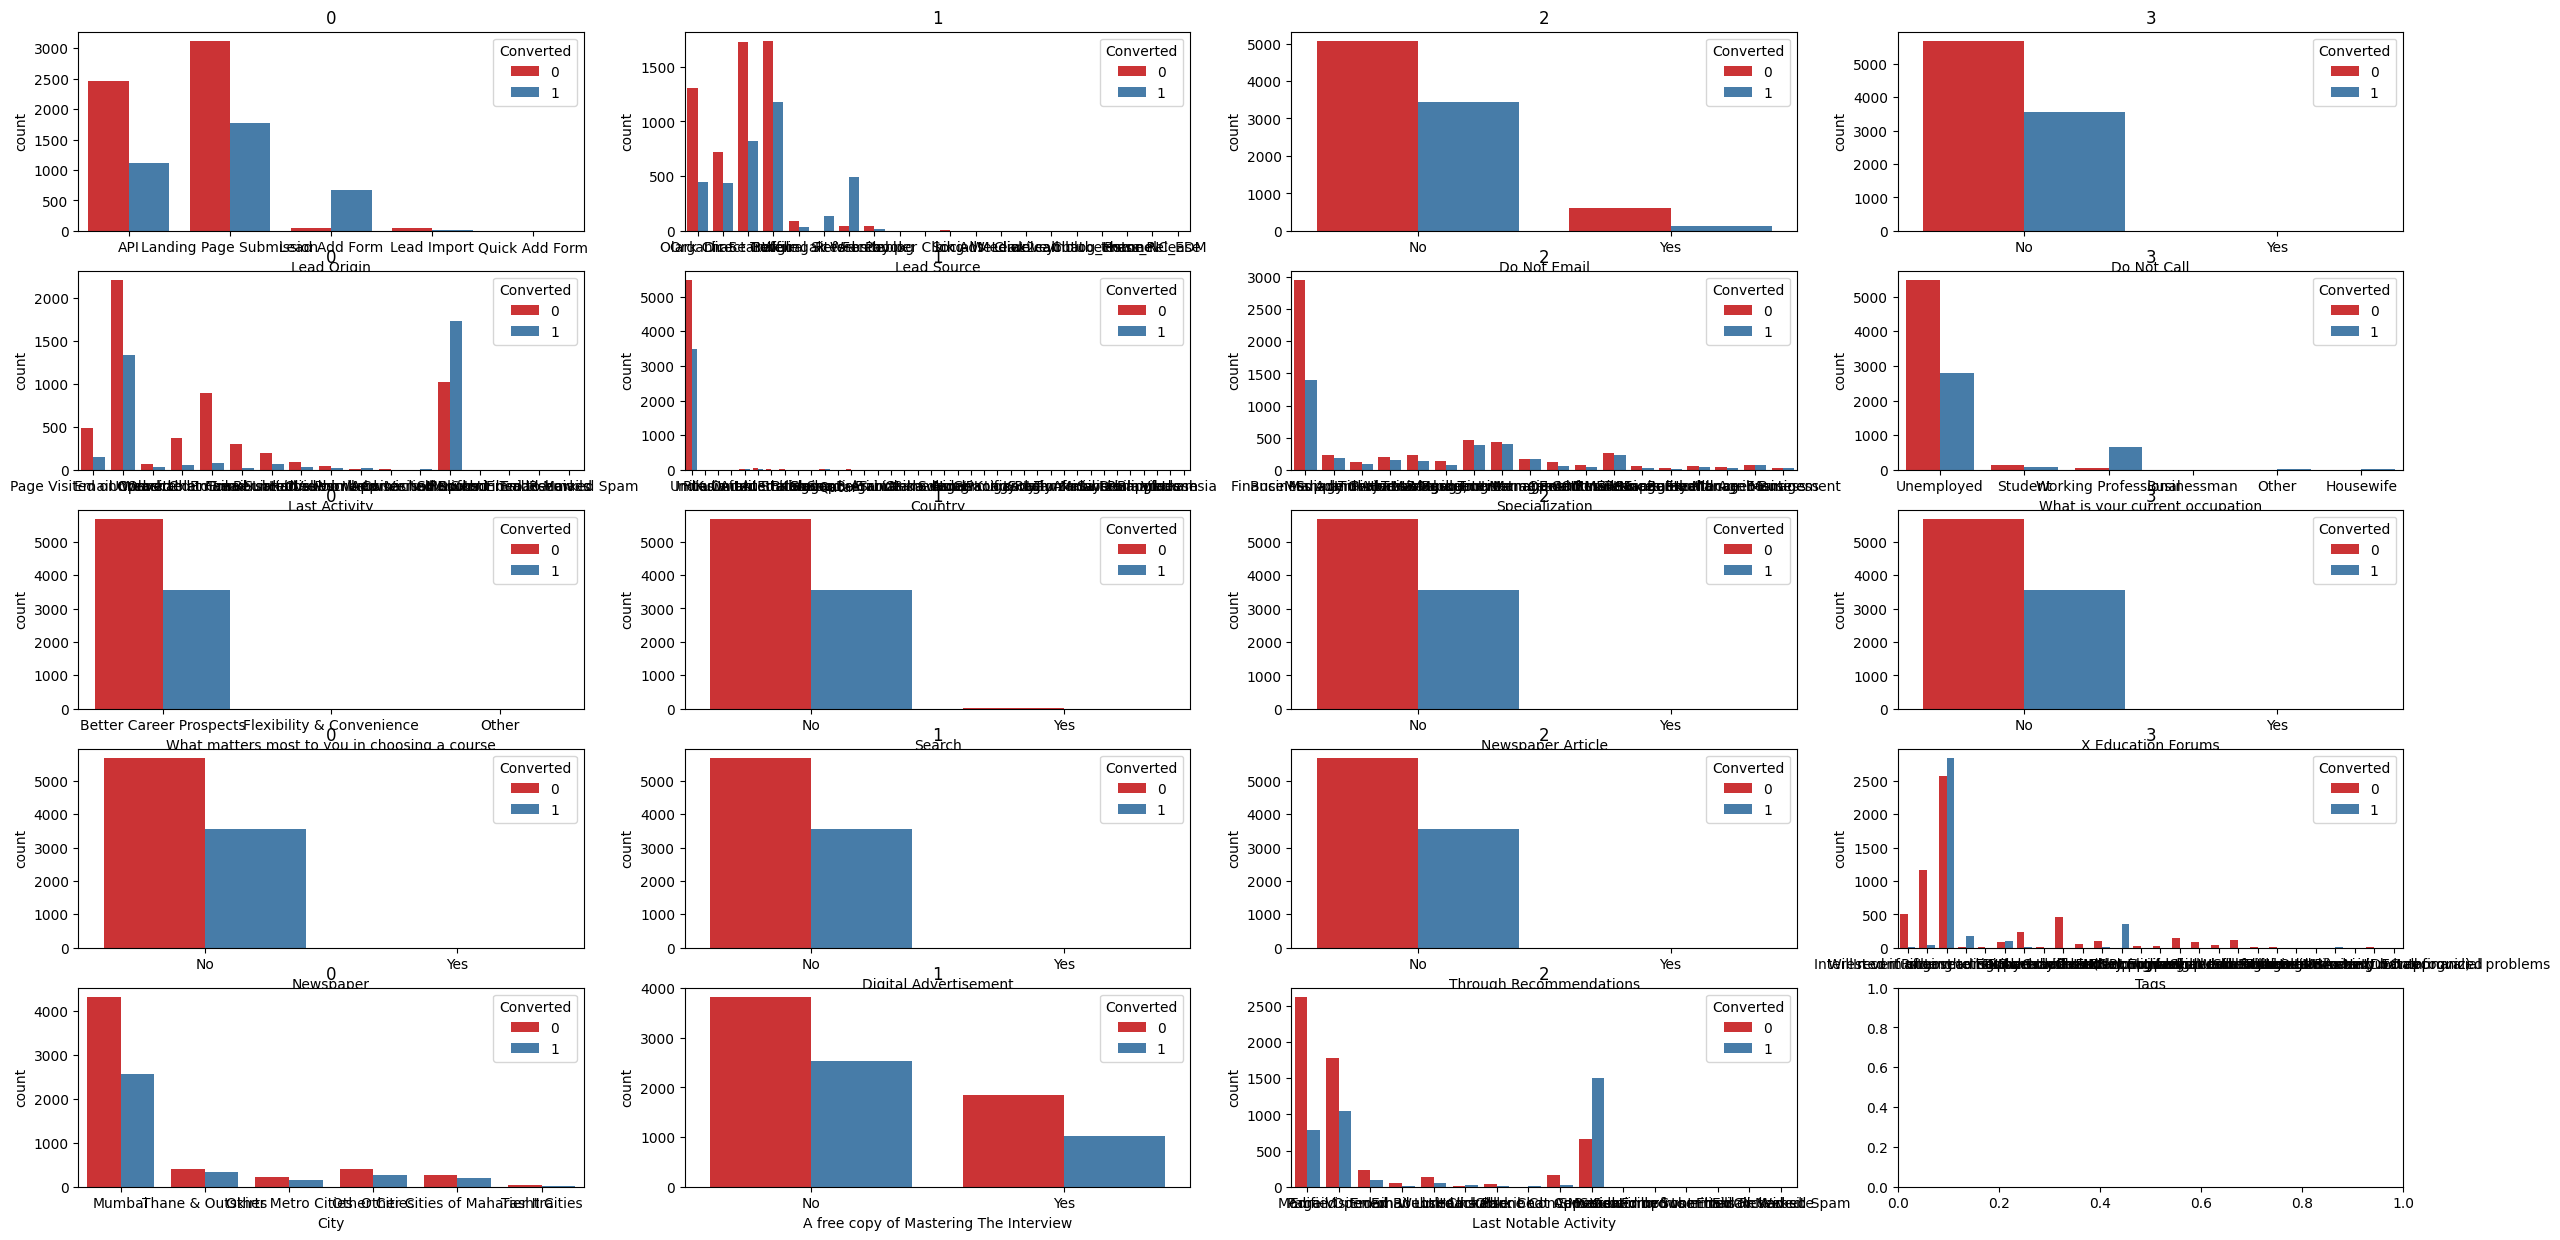

In [ ]:
#col_remove = ["Do Not Call","Through Recommendations","Digital Advertisement","Newspaper","X Education Forums","Newspaper Article","Search","What matters most to you in choosing a course"]
fig, axs = plt.subplots(5,4,figsize = (30,15))
x=0;i=0
for col in cat_col:
    sns.countplot(x = col, hue = "Converted", data = leads_df, ax = axs[x,i],palette = 'Set1')
    axs[x,i].set_title(i)
    if i>1 and i%3 == 0:
        x+=1
        i=0

    else:
        i+=1

plt.show()

Visualising the corelation between Numerical variables.

<function matplotlib.pyplot.show(close=None, block=None)>

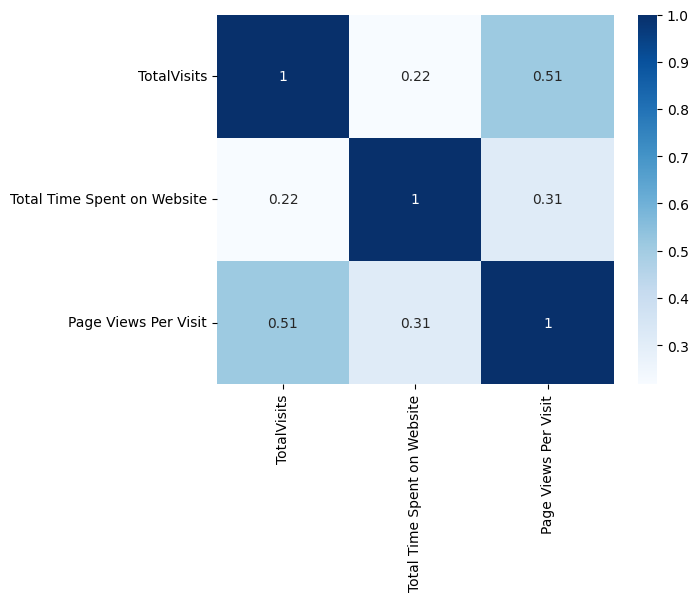

In [ ]:
sns.heatmap(data=leads_df[num_col].corr(),cmap="Blues",annot=True)
plt.show

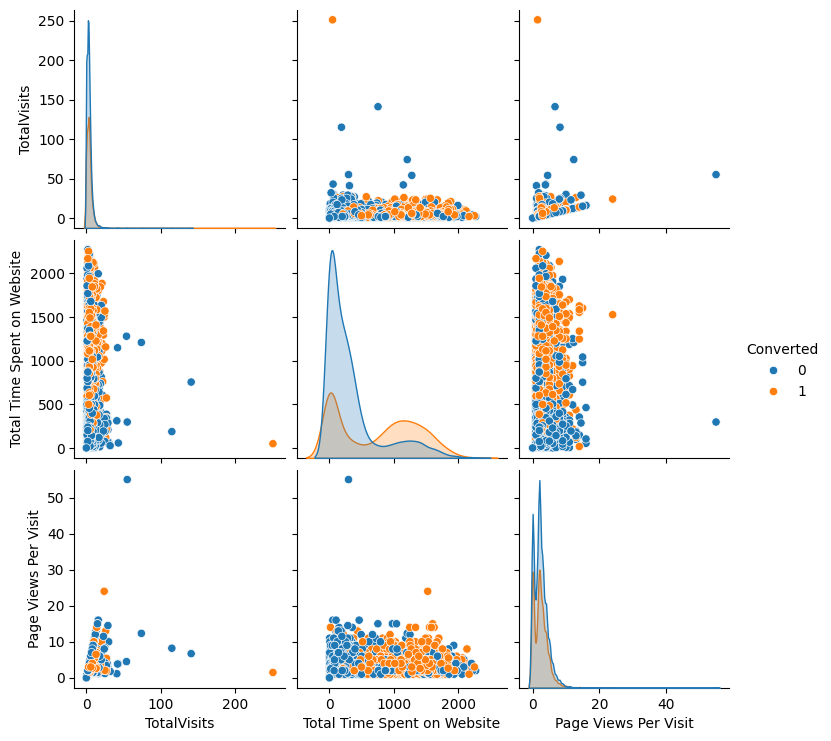

In [ ]:
sns.pairplot(data= leads_df,diag_kind='kde',hue='Converted')
plt.show()

###outliers
Checking for Outliers in numerical variables.

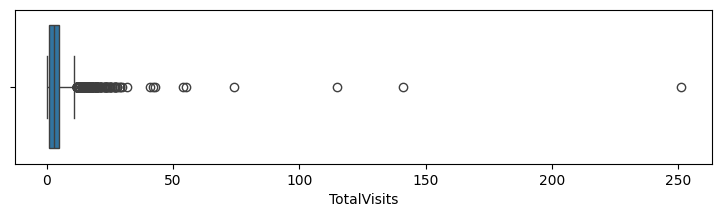

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


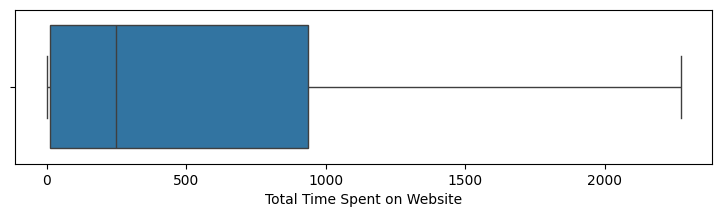

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


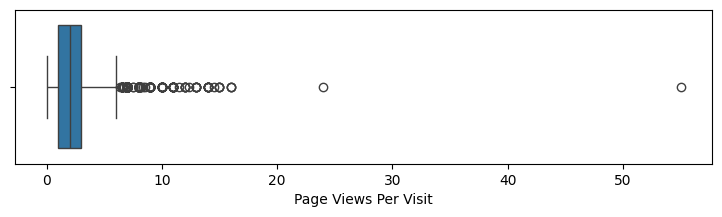

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [ ]:
for col in num_col:
    plt.figure(figsize=(9,2))
    sns.boxplot(x=leads_df[col])
    plt.show()
    print("!"*90)

#Data preparation for the Model

handling categorical variables.

In [ ]:
leads_df = pd.get_dummies(data= leads_df,columns=cat_col,drop_first=True)

Boolean are beeing converted to int type

In [ ]:
cols = leads_df.columns.to_list()
for col in cols:
    if leads_df[col].dtype=="bool":
        leads_df[col]=leads_df[col].astype("uint8")

In [ ]:
#looking into data
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last N

Importing required libreries for the analysis

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#looking into shape of data
leads_df.shape

(9240, 158)

In [ ]:
#dividing into X and y dataset.
X=leads_df.drop(columns=["Converted"])
y=leads_df["Converted"]

In [ ]:
# spliting into test and train data set with 70:30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#looking into shape of train and test dataset
print("Shape on X_train is : ",X_train.shape)
print("Shape on X_test is:",X_test.shape)
print("Shape on y_train is:",y_train.shape)
print("Shape on y_test is:",y_test.shape)

Shape on X_train is :  (6468, 157)
Shape on X_test is: (2772, 157)
Shape on y_train is: (6468,)
Shape on y_test is: (2772,)


Scaling continues varable of training data set and performing fit and transform on training dataset.

In [ ]:
scaler=StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Act

looking into satistics of train set.

In [ ]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Act

#building modle with RFE

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

Selecting top 20 featues having might have correlation with target variable.

In [ ]:
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#columns selected or rejected with their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 81),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 80),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Origin_Quick Add Form', False, 65),
 ('Lead Source_Direct Traffic', False, 41),
 ('Lead Source_Facebook', False, 55),
 ('Lead Source_Google', False, 43),
 ('Lead Source_Live Chat', False, 102),
 ('Lead Source_NC_EDM', False, 60),
 ('Lead Source_Olark Chat', False, 114),
 ('Lead Source_Organic Search', False, 44),
 ('Lead Source_Pay per Click Ads', False, 121),
 ('Lead Source_Press_Release', False, 130),
 ('Lead Source_Reference', False, 98),
 ('Lead Source_Referral Sites', False, 42),
 ('Lead Source_Social Media', False, 32),
 ('Lead Source_WeLearn', False, 89),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 53),
 ('Lead Source_blog', False, 38),
 ('Lead Source_testone', False, 137),
 ('Lead Source_welearnblog_H

Function to Calculate VIF, to check compatibility of features in RFE modles

In [ ]:
def calc_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

Printing selected and rejected column names from RFE.

In [ ]:
X_train_rfe=X_train.columns[rfe.support_].tolist()
print(X_train_rfe)

['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Do Not Email_Yes', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Interested in Next batch', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off', 'Tags_wrong number given', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_SMS Sent']


In [ ]:
X_train_rfe_exlusion=X_train.columns[~rfe.support_].tolist()
print(X_train_rfe_exlusion)

['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog', 'Lead Source_testone', 'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel', 'Do Not Call_Yes', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received', 'Last Activity_Form Submitted on Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last A

# Creating Models

###Model !1

In [ ]:
#Selected columns for Model 1 - all columns selected by RFE
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
             'Tags_Interested in Next batch', 'Tags_Lateral student',
             'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
             'Tags_in touch with EINS', 'Tags_invalid number',
             'Tags_switched off', 'Tags_wrong number given',
             'Last Notable Activity_Email Bounced', 'Last Notable Activity_Had a Phone Conversation',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
calc_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2066.0
Date:                Sat, 03 Aug 2024   Deviance:                       4131.9
Time:                        15:19:35   Pearson chi2:                 1.08e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5000
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

droping 'Tags_Interested in Next batch' as it has high coeff value

##Model 2

In [ ]:
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
              'Tags_Lateral student',
             'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
             'Tags_in touch with EINS', 'Tags_invalid number',
             'Tags_switched off', 'Tags_wrong number given',
             'Last Notable Activity_Email Bounced', 'Last Notable Activity_Had a Phone Conversation',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
calc_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2074.3
Date:                Sat, 03 Aug 2024   Deviance:                       4148.7
Time:                        15:19:35   Pearson chi2:                 1.07e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4987
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Due to high p value dropping 'Tags_Lateral student'

##Model 3

In [ ]:
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
             'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
             'Tags_in touch with EINS', 'Tags_invalid number',
             'Tags_switched off', 'Tags_wrong number given',
             'Last Notable Activity_Email Bounced', 'Last Notable Activity_Had a Phone Conversation',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
calc_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Sat, 03 Aug 2024   Deviance:                       4156.5
Time:                        15:19:36   Pearson chi2:                 1.06e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4981
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Dropping Tags_wrong number given due to high P value

##Model 4

In [ ]:
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
             'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
             'Tags_in touch with EINS', 'Tags_invalid number',
             'Tags_switched off',
             'Last Notable Activity_Email Bounced', 'Last Notable Activity_Had a Phone Conversation',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
calc_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.5
Date:                Sat, 03 Aug 2024   Deviance:                       4161.0
Time:                        15:19:36   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4978
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

dropping Tags_invalid number due to high P value

##Model 5

In [ ]:
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
             'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
             'Tags_in touch with EINS',
             'Tags_switched off',
             'Last Notable Activity_Email Bounced', 'Last Notable Activity_Had a Phone Conversation',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
calc_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2081.8
Date:                Sat, 03 Aug 2024   Deviance:                       4163.5
Time:                        15:19:36   Pearson chi2:                 1.09e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4976
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Droping 'Last Notable Activity_Email Bounced' due to the High P value.

##Model 6

In [ ]:
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
             'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
             'Tags_in touch with EINS',
             'Tags_switched off',
             'Last Notable Activity_Had a Phone Conversation',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
calc_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2083.5
Date:                Sat, 03 Aug 2024   Deviance:                       4166.9
Time:                        15:19:37   Pearson chi2:                 1.09e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4973
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

'Tags_switched off' is being droped due to high P value.

##Model 7

In [ ]:
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
             'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
             'Tags_in touch with EINS',
             'Last Notable Activity_Had a Phone Conversation',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
calc_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2087.2
Date:                Sat, 03 Aug 2024   Deviance:                       4174.4
Time:                        15:19:37   Pearson chi2:                 1.10e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4967
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

'Tags_Ringing' is being removed due to the high P value.

##Model 8

In [ ]:
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
             'Tags_Lost to EINS',  'Tags_Will revert after reading the email',
             'Tags_in touch with EINS',
             'Last Notable Activity_Had a Phone Conversation',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
calc_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2089.7
Date:                Sat, 03 Aug 2024   Deviance:                       4179.3
Time:                        15:19:37   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4963
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Dropping 'Last Notable Activity_Had a Phone Conversation' due to high P value.

##Model 9

In [ ]:
rfe_cols=['Lead Origin_Lead Add Form', 'Do Not Email_Yes',
             'Last Activity_Converted to Lead',
             'Last Activity_Olark Chat Conversation',
             'What is your current occupation_Unemployed',
             'What is your current occupation_Working Professional',
             'Tags_Busy', 'Tags_Closed by Horizzon',
             'Tags_Lost to EINS',  'Tags_Will revert after reading the email',
             'Tags_in touch with EINS',
             'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
calc_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2098.3
Date:                Sat, 03 Aug 2024   Deviance:                       4196.6
Time:                        15:19:37   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4950
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

All P valuesand VIF are sufficiently are low now, so we can proceed with this features.

Predicting in train data set

In [ ]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
4715,0.397980
7132,0.397980
8954,0.098662
5283,0.002427
3003,0.397980
478,0.097161
1352,0.397980
3166,0.992027
7700,0.010351
2647,0.001700


Reshaping the data

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.3979804 , 0.3979804 , 0.09866236, 0.00242715, 0.3979804 ,
       0.09716131, 0.3979804 , 0.99202689, 0.01035144, 0.00169986])

Creating a new dataframe with converted and predicted

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Cnvrtd_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()


,Converted,Cnvrtd_prob,ID
0,0,0.397980,4715
1,1,0.397980,7132
2,0,0.098662,8954
3,0,0.002427,5283
4,0,0.397980,3003


Predicting in train data set.

In [ ]:
y_train_pred_final['Pred'] = y_train_pred_final.Cnvrtd_prob.map(lambda x: 1 if x > 0.5 else 0)

# seeing the head
y_train_pred_final.head()

,Converted,Cnvrtd_prob,ID,Pred
0,0,0.397980,4715,0
1,1,0.397980,7132,0
2,0,0.098662,8954,0
3,0,0.002427,5283,0
4,0,0.397980,3003,0


Creating Confusion Matrix

In [ ]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Pred)
print(confusion)

[[3849  135]
 [ 792 1692]]


Checking for overall Accuracy.

In [ ]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Pred))

0.8566790352504638


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Sensitivity of our LR model

In [ ]:
TP / float(TP+FN)

0.6811594202898551

Specificity of our LR model

In [ ]:
TN / float(TN+FP)

0.9661144578313253

False positive rate of our model

In [ ]:
FP/ float(TN+FP)

0.0338855421686747

True negative value

In [ ]:
TN / float(TN+ FN)

0.8293471234647706

## Ploting ROC curve

In [ ]:
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual,probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6,6))
    plt.plot( fpr, tpr, label=' ROC curve(area = %0.2f)' % auc_score )
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Cnvrtd_prob, drop_intermediate = False )

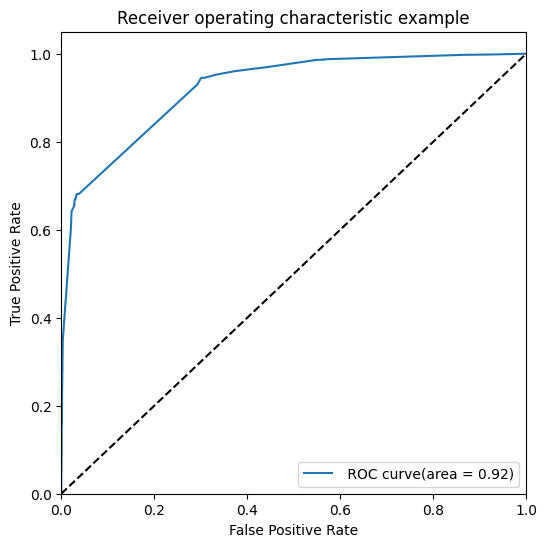

In [ ]:
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Cnvrtd_prob)

Ideally value of ROC curve should be 1,
we are getting value of ROC curve as 0.92 which is pretty close to 1, hence we cn continue.

## Coosing a optimal Cut-off value

Coosing a optimal cutt-off value is impoertant as previously we randoml considered 0.5 as the cutt-off value.

In [ ]:
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Cnvrtd_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Cnvrtd_prob,ID,Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.397980,4715,0,1,1,1,1,0,0,0,0,0,0
1,1,0.397980,7132,0,1,1,1,1,0,0,0,0,0,0
2,0,0.098662,8954,0,1,0,0,0,0,0,0,0,0,0
3,0,0.002427,5283,0,1,0,0,0,0,0,0,0,0,0
4,0,0.397980,3003,0,1,1,1,1,0,0,0,0,0,0


Calculating accuracy sensitivity and specificity for various cut-off values

In [ ]:
cutoff_df = pd.DataFrame( columns = ['prob','accu','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cnfmtx = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    ttl=sum(sum(cnfmtx))
    accu = (cnfmtx[0,0]+cnfmtx[1,1])/ttl

    speci = cnfmtx[0,0]/(cnfmtx[0,0]+cnfmtx[0,1])
    sensi = cnfmtx[1,1]/(cnfmtx[1,0]+cnfmtx[1,1])
    cutoff_df.loc[i] =[ i ,accu,sensi,speci]
print(cutoff_df)

     prob      accu     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.754020  0.960548  0.625251
0.2   0.2  0.793135  0.945250  0.698293
0.3   0.3  0.793754  0.944444  0.699799
0.4   0.4  0.854205  0.681562  0.961847
0.5   0.5  0.856679  0.681159  0.966114
0.6   0.6  0.856215  0.677536  0.967620
0.7   0.7  0.854515  0.668680  0.970382
0.8   0.8  0.850031  0.654187  0.972139
0.9   0.9  0.747062  0.346618  0.996737


ploting sensitivity, specificity and accuracy for different probability

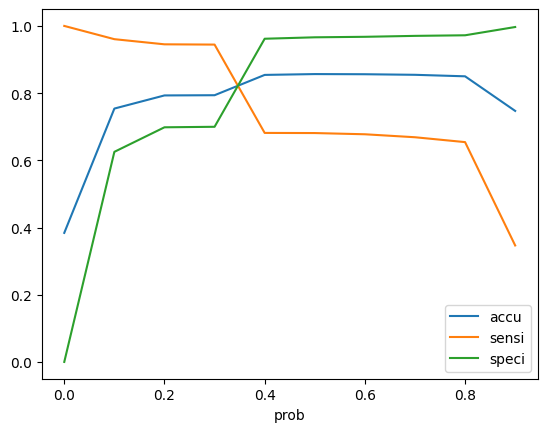

In [ ]:
cutoff_df.plot.line(x='prob', y=['accu','sensi','speci'])
plt.show()

from the curve we can see that 0.35 is the optimal value for the cut-off

In [ ]:
y_train_pred_final['final_Pred'] = y_train_pred_final.Cnvrtd_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Cnvrtd_prob,ID,Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Pred
0,0,0.397980,4715,0,1,1,1,1,0,0,0,0,0,0,1
1,1,0.397980,7132,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.098662,8954,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.002427,5283,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.397980,3003,0,1,1,1,1,0,0,0,0,0,0,1


In [ ]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Cnvrtd_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Cnvrtd_prob','ID','final_Pred','Lead_Score']].head()

,Converted,Cnvrtd_prob,ID,final_Pred,Lead_Score
0,0,0.397980,4715,1,40
1,1,0.397980,7132,1,40
2,0,0.098662,8954,0,10
3,0,0.002427,5283,0,0
4,0,0.397980,3003,1,40


Checking for overall acuuracy

In [ ]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Pred)

0.79282622139765

In [ ]:
conf_matx = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Pred )
conf_matx

array([[2816, 1168],
       [ 172, 2312]])

In [ ]:
TP = conf_matx[1,1] # true positive
TN = conf_matx[0,0] # true negatives
FP = conf_matx[0,1] # false positives
FN = conf_matx[1,0] # false negatives

Sensitivity of the model

In [ ]:
TP / float(TP+FN)

0.9307568438003221

Specificity of the model

In [ ]:
TN / float(TN+FP)

0.7068273092369478

False positive

In [ ]:
FP/ float(TN+FP)

0.2931726907630522

In [ ]:
#positive predictive value
TP / float(TP+FP)

0.664367816091954

In [ ]:
#negative predictive value
TN / float(TN+ FN)

0.9424364123159303

In [ ]:
#precision
TP / TP + FP

1169.0

In [ ]:
#recall
TP / TP + FN

173.0

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.final_Pred
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Cnvrtd_prob)

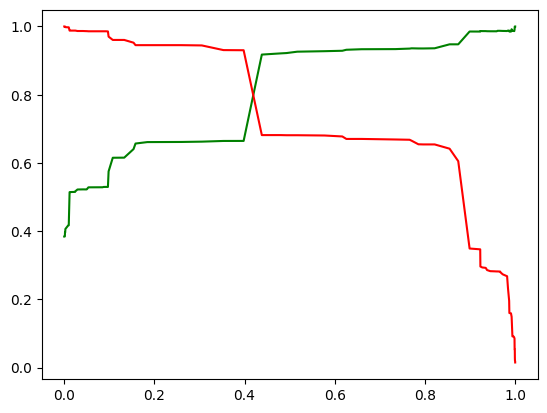

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Checking accuracy at 0.38

In [ ]:
y_train_pred_final['final_Pred'] = y_train_pred_final.Cnvrtd_prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Cnvrtd_prob,ID,Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Pred,Lead_Score
0,0,0.397980,4715,0,1,1,1,1,0,0,0,0,0,0,1,40
1,1,0.397980,7132,0,1,1,1,1,0,0,0,0,0,0,1,40
2,0,0.098662,8954,0,1,0,0,0,0,0,0,0,0,0,0,10
3,0,0.002427,5283,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.397980,3003,0,1,1,1,1,0,0,0,0,0,0,1,40


In [ ]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Cnvrtd_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Cnvrtd_prob','ID','final_Pred','Lead_Score']].head()

,Converted,Cnvrtd_prob,ID,final_Pred,Lead_Score
0,0,0.397980,4715,1,40
1,1,0.397980,7132,1,40
2,0,0.098662,8954,0,10
3,0,0.002427,5283,0,0
4,0,0.397980,3003,1,40


In [ ]:
#checking the accuracy for cut-off at 0.38
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Pred)

0.79282622139765

In [ ]:
conf_matx1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Pred )
conf_matx1

array([[2817, 1167],
       [ 173, 2311]])

In [ ]:
TP = conf_matx1[1,1] # true positive
TN = conf_matx1[0,0] # true negatives
FP = conf_matx1[0,1] # false positives
FN = conf_matx1[1,0] # false negatives

In [ ]:
# Sensitivity
TP / float(TP+FN)

0.9303542673107891

In [ ]:
#specificity
TN / float(TN+FP)

0.7070783132530121

Accuracy is almost same for both the cuttoff values 0.35 and 0.38

### Working on test values.


Scaling the test set.

In [ ]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Act

In [ ]:
X_test = X_test[rfe_cols]
X_test.head()

,Lead Origin_Lead Add Form,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Will revert after reading the email,Tags_in touch with EINS,Last Notable Activity_SMS Sent
4608,0,0,0,0,1,0,0,1,0,0,0,0
7935,0,1,0,0,1,0,0,0,0,1,0,0
4043,0,1,0,0,0,0,0,0,0,1,0,0
7821,0,0,0,0,0,1,0,0,0,0,0,0
856,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
X_test_sm = sm.add_constant(X_test[rfe_cols])

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

,0
4608,0.986563
7935,0.133279
4043,0.438331
7821,0.158330
856,0.397980
927,0.097161
318,0.922415
1018,0.305310
8151,0.098662
1570,0.990622


Converting y_pred wich is in array formate to dataframe

In [ ]:
y_pred_df = pd.DataFrame(y_test_pred)

In [ ]:
y_pred_df.head()

,0
4608,0.986563
7935,0.133279
4043,0.438331
7821,0.158330
856,0.397980


In [ ]:
y_test_df = pd.DataFrame(y_test)

Creating a index

In [ ]:
y_test_df['ID'] = y_test_df.index

Removing index from both dataframe, so that it can be appended

In [ ]:
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

Appending y_pred and y_test data sets

In [ ]:
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [ ]:
y_pred_final.head()

,Converted,ID,0
0,1,4608,0.986563
1,0,7935,0.133279
2,0,4043,0.438331
3,0,7821,0.158330
4,0,856,0.397980


Renaming columns

In [ ]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Cnvrtd_prob'})

In [ ]:
y_pred_final.head()

,Converted,ID,Cnvrtd_prob
0,1,4608,0.986563
1,0,7935,0.133279
2,0,4043,0.438331
3,0,7821,0.158330
4,0,856,0.397980


Sorting the columns

In [ ]:
y_pred_final = y_pred_final[['ID','Converted','Cnvrtd_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Cnvrtd_prob.map( lambda x: round(x*100))

In [ ]:
y_pred_final.head()

,ID,Converted,Cnvrtd_prob,Lead_Score
0,4608,1,0.986563,99
1,7935,0,0.133279,13
2,4043,0,0.438331,44
3,7821,0,0.158330,16
4,856,0,0.397980,40


In [ ]:
y_pred_final['final_Pred'] = y_pred_final.Cnvrtd_prob.map(lambda x: 1 if x > 0.38 else 0)

In [ ]:
y_pred_final.head()

,ID,Converted,Cnvrtd_prob,Lead_Score,final_Pred
0,4608,1,0.986563,99,1
1,7935,0,0.133279,13,0
2,4043,0,0.438331,44,1
3,7821,0,0.158330,16,0
4,856,0,0.397980,40,1


In [ ]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Pred)

0.7918470418470418

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Pred )
confusion2

array([[1178,  517],
       [  60, 1017]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
#sensitivity
TP / float(TP+FN)

0.9442896935933147

In [ ]:
#specificity
TN / float(TN+FP)

0.6949852507374631

In [ ]:
#Precision
precision_score(y_pred_final.Converted , y_pred_final.final_Pred)

0.6629726205997393

In [ ]:
#recall
recall_score(y_pred_final.Converted, y_pred_final.final_Pred)

0.9442896935933147


Final Observation:
Comparing the values obtained for test and train data sets.

Train Data:
Accuracy : 79.28%
Sensitivity : 93.03%
Specificity : 70.70%

Test Data:
Accuracy : 79.18%
Sensitivity : 94.43%
Specificity : 79.5%

Model is giving approx 79% accuracy on predicting the conversion. As this is a prety good number we can give confidance.

Probabilty Threshold/cutoff

Final Features that are selected:

'Lead Origin_Lead Add Form',
'Do Not Email_Yes',
'Last Activity_Converted to Lead',
'Last Activity_Olark Chat Conversation',
'What is your current occupation_Unemployed',
'What is your current occupation_Working Professional',
'Tags_Busy', 'Tags_Closed by Horizzon',
'Tags_Lost to EINS',
'Tags_Will revert after reading the email',
'Tags_in touch with EINS',
'Last Notable Activity_SMS Sent'